In [2]:
from utils import *
from binary_relations_utils import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

##### Helpful functions

In [3]:
# ------------------------ #
# Helper logging functions
# ------------------------ #
def print_log(text: str):
    """
    Prints the log
    """
    print(f"[ log ]: {text}")

def print_error(text: str):
    """
    Prints the error
    """
    print(f"[ error ]: {text}")

# ------------------------ #
# Helper matrix functions
# ------------------------ #
def get_matrix(n_row: int = 5, n_col: int = 5, low: int = 2, seed: int = 0) -> npmat.matrix:
    """
    Returns a random matrix of a given size

    Parameters
    ----------
    n_row: int
        Number of rows
    n_col: int
        Number of columns
    low: int
        Lower bound of the random numbers
    seed: int
        Seed for the random number generator
    
    Returns
    -------
    npmat.matrix
        A random matrix
    
    Example
    -------
    >>> get_matrix(n_row=n_row, n_col=n_col, seed=0)
    matrix([[0, 1, 1, 0, 1],
            [1, 1, 1, 1, 1],
            [1, 0, 0, 1, 0],
            [0, 0, 0, 0, 1],
            [0, 1, 1, 0, 0]])
    """
    np.random.seed(seed=seed)
    return npmat.asmatrix(np.random.randint(low, size=(n_row, n_col)))

def get_matrix_from_list(list_of_lists: list) -> npmat.matrix:
    """
    Returns a matrix from a list of lists
    """
    return npmat.asmatrix(list_of_lists)

#### Get data

In [22]:
# parent_dir = abspath(join(join(getcwd(), pardir), pardir))
# data_dir = join(parent_dir, 'data')
# data_file = join(data_dir, 'DM-HT_small.txt')

n_row, n_col = 5, 6
matrix = get_matrix(n_row=n_row, n_col=n_col, seed=0)
matrix

matrix([[0, 1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 0],
        [0, 1, 1, 1, 1, 0]])

In [23]:
matrix.shape

(5, 6)

In [4]:
def CompleteCheck(matrix: npmat.matrix) -> bool:
    """
    Checks if the matrix is complete
    """
    for i in range(n_row):
        for j in range(n_col):
            if matrix[i, j] == 0 or matrix[i, j] == 0:
                return False
    return True

'Graph with 2 nodes and 2 edges'

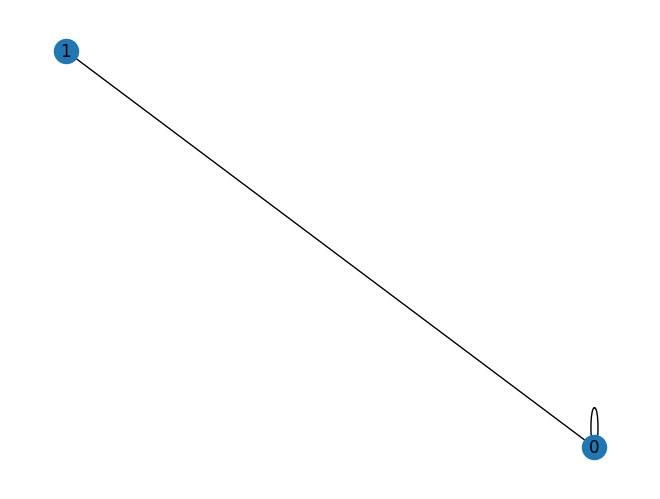

In [27]:
import numpy as np
import networkx as nx
A = np.array([[1, 1], [1, 0]])
G = nx.from_numpy_matrix(A)
str(G)
nx.draw(G, with_labels=True)

In [5]:
def ReflexiveCheck(matrix: npmat.matrix) -> bool:
    """
    Checks if the matrix is reflexive
    """
    for i in range(n_row):
        if matrix[i, i] != 1:
            return False
    return True

In [6]:
def SymmetricCheck(matrix: npmat.matrix) -> bool:
    """
    Checks if the matrix is symmetric
    """
    for i in range(n_row):
        for j in range(n_col):
            if matrix[i, j] != matrix[j, i]:
                return False
    return True

In [7]:
def AntisymmetricCheck(matrix: npmat.matrix) -> bool:
    """
    Checks if the matrix is antisymmetric
    """
    for i in range(n_row):
        for j in range(n_col):
            if matrix[i, j] == 1 and matrix[j, i] == 1 and i != j:
                return False
    return True

In [8]:
def TransitiveCheck(matrix: npmat.matrix) -> bool:
    """
    Checks if the matrix is transitive
    """
    for i in range(n_row):
        for j in range(n_col):
            for k in range(n_col):
                if matrix[i, j] == 1 and matrix[j, k] == 1 and matrix[i, k] != 1:
                    return False
    return True

In [9]:
def EquivalenceCheck(matrix: npmat.matrix) -> bool:
    """
    Checks if the matrix is an equivalence relation
    """
    return ReflexiveCheck(matrix) and SymmetricCheck(matrix) and TransitiveCheck(matrix)

In [10]:
def PartialOrderCheck(matrix: npmat.matrix) -> bool:
    """
    Checks if the matrix is a partial order
    """
    return AntisymmetricCheck(matrix) and TransitiveCheck(matrix)